In [1]:
import pandas as pd # importamos el modulo
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function # utilizar print como funcion 
from scipy import stats # importando scipy.stats
from ProgramasProba.Proba import *

In [2]:
vcnormal = stats.norm(loc=3, scale=2)
Xnormal = vcnormal.rvs(size=100)
df = pd.DataFrame({'Datos-norm':Xnormal})

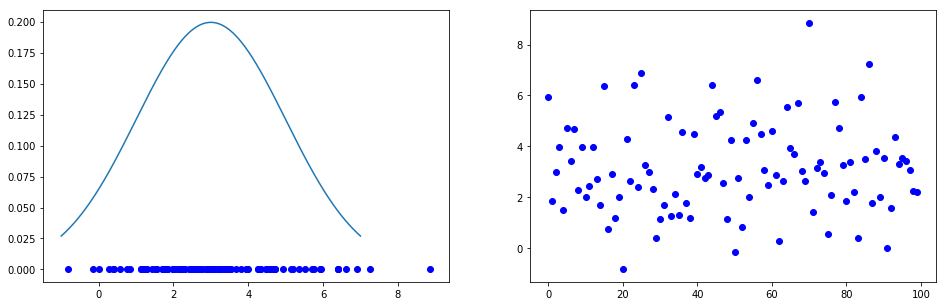

In [3]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
x=np.linspace(-1,7,num=300)
Y=np.zeros(100)
ax1.plot(x,vcnormal.pdf(x))
ax1.plot(Xnormal,Y,'ob')
ax2.scatter(x=np.linspace(0,99,num=100), y=df['Datos-norm'],color='b') 
plt.show()

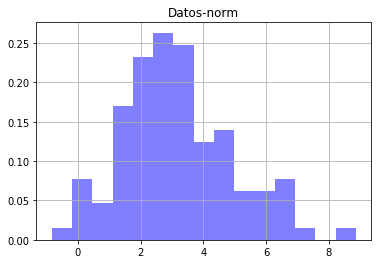

In [4]:
df.hist(color='b', alpha=0.5, bins=15, density=True);

# Intervalos de confanza para varianza de la población conocida

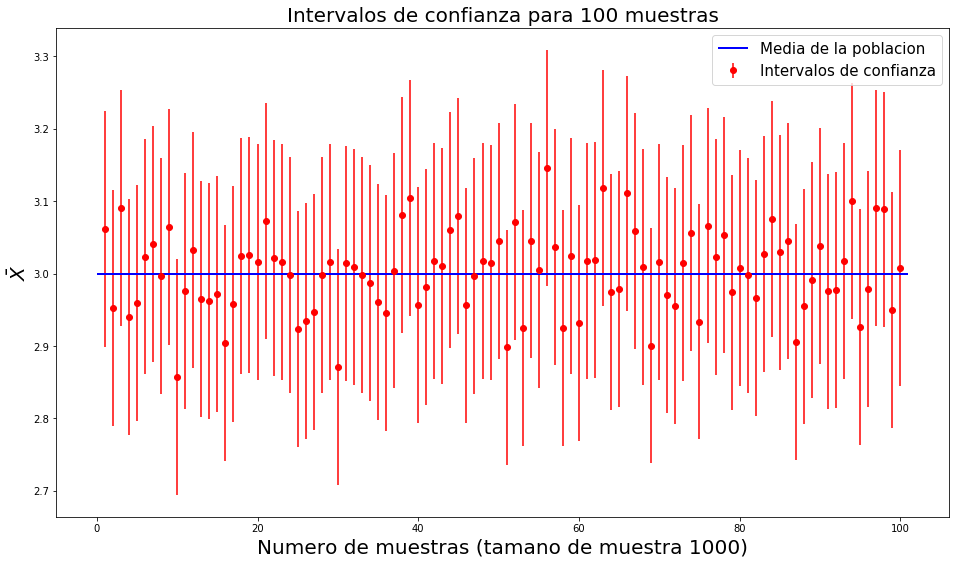

In [12]:
numero_de_muestras= 100
tam_muestra = 1000
alpha=0.01

intervalos = []
medias = []

for num in range(numero_de_muestras):
    
    muestra_media = stats.norm.rvs(size=tam_muestra,loc=3,scale=2).mean()
    medias.append(muestra_media)

    z_alpha = stats.norm.ppf(q = 1-alpha/2)  # el valor z alpha/2         

    des_pobla = 2  # desviacion de la poblacion

    margen_de_error = z_alpha * (des_pobla/np.sqrt(tam_muestra))

    intervalo_confianza = (muestra_media - margen_de_error,
                           muestra_media + margen_de_error)  
    
    intervalos.append(intervalo_confianza)
    
plt.figure(figsize=(16,9))


plt.errorbar(x=np.arange(1, numero_de_muestras + 1, 1), 
             y=medias, 
             yerr=[(sup-inf)/2 for inf, sup in intervalos],
            fmt='ro',label="Intervalos de confianza")

plt.xlabel('Numero de muestras (tamano de muestra %d)'%tam_muestra,fontsize=20)
plt.ylabel(r'$\bar{X}$',fontsize=20)
plt.hlines(xmin=0, xmax=numero_de_muestras+1,
           y=3, 
           linewidth=2.0,
           color="blue",label="Media de la poblacion")
plt.title("Intervalos de confianza para %d muestras"%numero_de_muestras,fontsize=20)
plt.legend(loc="best",fontsize=15)
plt.show()

In [6]:
# Ejemplo para media y varianza desconocida
datos=[9.8, 10.2, 10.4, 9.8, 10.0, 10.2, 9.6]
df=pd.DataFrame({'Datos':datos})
print("Media de los datos", df.mean())
print("Variansa de los datos",df.var())
print("Desviacion estandar de los datos",np.sqrt(df.var()),df.std())

Media de los datos Datos    10.0
dtype: float64
Variansa de los datos Datos    0.08
dtype: float64
Desviacion estandar de los datos Datos    0.282843
dtype: float64 Datos    0.282843
dtype: float64
